In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load data
df = pd.read_csv("fruit.csv")
X = df[["length_cm", "weight_g", "yellow_score"]].values
y = df["label"].values.reshape(-1, 1)

In [5]:
# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [6]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
# Binary cross-entropy loss
def loss_fn(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-8) + (1 - y) * np.log(1 - y_hat + 1e-8))

In [8]:
# Accuracy
def accuracy(y, y_hat):
    preds = y_hat >= 0.5
    return np.mean(preds == y)

In [9]:
# Training
epochs = 1000
lr = 0.1
m, n = X.shape

In [10]:
# Initialize weights and bias
W = np.random.randn(n, 1)
b = np.zeros((1,))

In [11]:

losses = []
accuracies = []

In [12]:
for epoch in range(epochs):
    # Forward pass
    z = np.dot(X, W) + b
    y_hat = sigmoid(z)
    
    # Compute loss and accuracy
    loss = loss_fn(y, y_hat)
    acc = accuracy(y, y_hat)
    
    losses.append(loss)
    accuracies.append(acc)
    
    # Early stop
    if loss < 0.05:
        break

    # Backward pass (gradient descent)
    dz = y_hat - y
    dW = np.dot(X.T, dz) / m
    db = np.mean(dz)

    W -= lr * dW
    b -= lr * db

In [13]:
# Final prediction
print(f"Final Accuracy: {acc*100:.2f}% after {epoch+1} epochs")

Final Accuracy: 100.00% after 83 epochs


In [14]:
# Plot loss and accuracy
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0, 0.5, 'Loss')

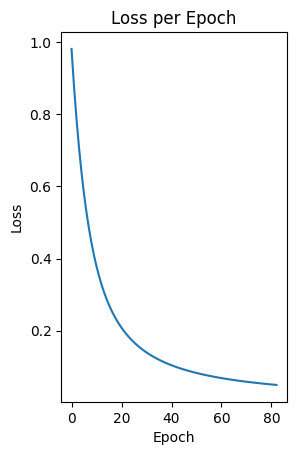

In [15]:
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

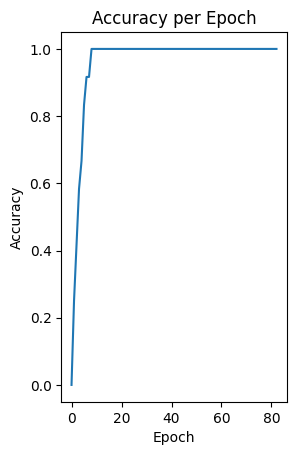

In [16]:
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>